In [65]:
import pandas as pd
import numpy as np
from collections import Counter

## **Stock Price Prediction**

https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018

### **200+ Financial Indicators of US stocks (2014-2018)**
(found in the 10-K filings each publicly traded company releases yearly)
### **Main Task:**
Algorithmic strategies for buy and hold
####   **Target Variable :**


1.   Price  Variation [%] Continuous Variable
2.   Class [1: Increasing, 0: Decreasing]

#### **Selected Target Variable:** 
1.   Price Variation [%]:  Continuous Variable
#### **Algorithmic Starategy: **
1.   Multiple Linear Regression 
2.   Regression with Polynomial Features

#### **Questions:**
1.   Why, Regression..?
2.    Why, financial data for all five years
#### **Reasons:**
       1. There is no one regression model that is best for predicting or forecasting variation in stock prices. 
       2. It depends on the type of data you are working with and the specific needs of your business.
       3. Regression analysis can handle many things. We can use regression analysis to do the following:


    a. Model multiple independent variables
    b. Include continuous and categorical variables
    c. Use polynomial terms to model curvature
    d. Assess interaction terms to determine whether the effect of one independent variable depends on the value of another variable

      4.Time-series analysis: This model uses historical data to identify patterns and trends that can be used to make predictions about future events.


In [66]:
# reading financial data for years 2014, 2015, 2016, 2017 and 2018
y = [2014, 2015, 2016, 2017, 2018]
df_stock = []
for i in range(0, len(y)):
  df = pd.read_csv(("." + "/" + str(y[i]) + "_Financial_Data" + ".csv"))
  df['Year'] = y[i]      # adding 'Year' column
  year = df['Year']
  df = df.drop(columns=['Year'])
  df.insert(loc=1, column='Year', value=year)  # shifting location of 'Year' column
  df.rename(columns = {(str(y[i]+1) + " PRICE VAR [%]") : 'PRICE VAR [%]'}, inplace = True)
  df_stock.append(df)

# combining (row wise) financial data for all the given years
df_comb = pd.concat([df_stock[0], df_stock[1], df_stock[2], df_stock[3], df_stock[4]])
df_comb.shape

(22077, 226)

In [67]:
# Get current data type of columns 
## converting 'Year' to object
df_comb['Year'] = df_comb.Year.astype(str)
df_comb.dtypes 


Unnamed: 0               object
Year                     object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
                         ...   
R&D Expense Growth      float64
SG&A Expenses Growth    float64
Sector                   object
PRICE VAR [%]           float64
Class                     int64
Length: 226, dtype: object

In [68]:
df_comb.head()

,Unnamed: 0,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE VAR [%],Class
0,PG,2014,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,2014,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,2014,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2014,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,2014,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [69]:
df_comb.tail()

,Unnamed: 0,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE VAR [%],Class
4387,YRIV,2018,0.0,0.0000,0.0,0.0,0.0,3755251.0,3755251.0,-3755251.0,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
4388,YTEN,2018,556000.0,-0.4110,0.0,556000.0,4759000.0,5071000.0,9830000.0,-9274000.0,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
4389,ZKIN,2018,54884381.0,0.2210,36593792.0,18290589.0,1652633.0,7020320.0,8672953.0,9617636.0,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
4390,ZOM,2018,0.0,0.0000,0.0,0.0,10317153.0,4521349.0,16648628.0,-16648628.0,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0
4391,ZYME,2018,53019000.0,0.0243,0.0,53019000.0,56684000.0,29457000.0,86146000.0,-33127000.0,...,-0.4185,0.0000,0.8519,0.1325,0.0000,0.3577,0.5880,Healthcare,209.462222,1


In [70]:
# target: 2019 PRICE VAR, drop the "Class" column
# drop the "Unnamed: 0" column
cols = ['Unnamed: 0','Class']
df1_comb = df_comb.drop(cols, axis =1)

In [71]:
df1_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Columns: 224 entries, Year to PRICE VAR [%]
dtypes: float64(222), object(2)
memory usage: 37.9+ MB


In [72]:
df1_comb.columns

Index(['Year', 'Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'PRICE VAR [%]'],
      dtype='object', length=224)

In [73]:
#check if there are missing values 
a = df1_comb.isna().sum(axis=0) # isnull
a 

Year                       0
Revenue                 1171
Revenue Growth          2088
Cost of Revenue         1771
Gross Profit            1207
                        ... 
Debt Growth             2615
R&D Expense Growth      2479
SG&A Expenses Growth    2422
Sector                     0
PRICE VAR [%]              0
Length: 224, dtype: int64

In [74]:
#displaying columns having missing values in descending order
result = np.argsort(-1*a)
a[result]

operatingCycle                                22058
cashConversionCycle                           22058
shortTermCoverageRatios                       10744
10Y Shareholders Equity Growth (per Share)     9680
10Y Revenue Growth (per Share)                 9532
                                              ...  
Net cash flow / Change in cash                 1018
Financing Cash Flow                             972
Year                                              0
Sector                                            0
PRICE VAR [%]                                     0
Length: 224, dtype: int64

In [75]:
# dropping columns having missing values more than 80 % of total values in those columns
for col in df1_comb.columns: 
    if sum(df1_comb[col].isnull())/float(len(df1_comb.index)) > 0.80: 
        del df1_comb[col]

In [76]:
# imputing missing values with median for rest of missing values
for col in df1_comb.columns:
    if sum(df1_comb[col].isnull()) > 0:
       df1_comb[col].fillna(df1_comb[col].median(), inplace=True)

In [77]:
df1_comb.shape

(22077, 222)

In [78]:
df1_comb.isna().sum(axis=0) # isnull 

Year                    0
Revenue                 0
Revenue Growth          0
Cost of Revenue         0
Gross Profit            0
                       ..
Debt Growth             0
R&D Expense Growth      0
SG&A Expenses Growth    0
Sector                  0
PRICE VAR [%]           0
Length: 222, dtype: int64

In [79]:
df1_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Columns: 222 entries, Year to PRICE VAR [%]
dtypes: float64(220), object(2)
memory usage: 37.6+ MB


(array([2.2074e+04, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1.00397220e+02,  2.41769734e+05,  4.83639865e+05,  7.25509997e+05,
         9.67380128e+05,  1.20925026e+06,  1.45112039e+06,  1.69299052e+06,
         1.93486065e+06,  2.17673078e+06,  2.41860092e+06]),
 <BarContainer object of 10 artists>)

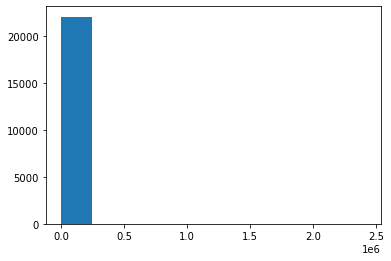

In [80]:
from matplotlib import pyplot as plt
%matplotlib inline

# check  outliers
plt.hist(sorted(df1_comb['PRICE VAR [%]'].values))

(array([   0.,  133., 1080., 2654., 6051., 7071., 3113., 1000.,  385.,
         186.]),
 array([-150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60.,   90.,
         120.,  150.]),
 <BarContainer object of 10 artists>)

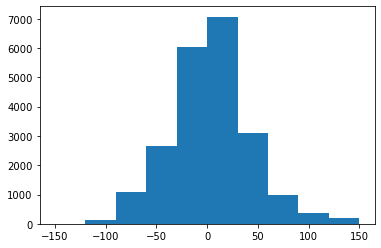

In [81]:
# check outliers with narrowed range
plt.hist(sorted(df1_comb['PRICE VAR [%]'].values),range=[-150,150])

<AxesSubplot:xlabel='PRICE VAR [%]'>

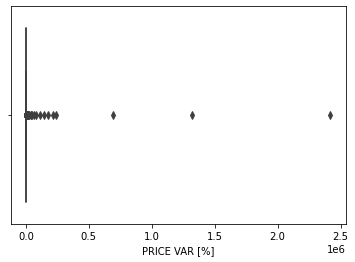

In [82]:
# check outliers through boxplot
import seaborn as sns 
sns.boxplot(x=df1_comb['PRICE VAR [%]'])

In [83]:
# fixing up upper and lower bound of target variable
df1_comb.loc[df1_comb['PRICE VAR [%]'] > 150, 'PRICE VAR [%]'] = 150 
df1_comb.loc[df1_comb['PRICE VAR [%]'] < -150, 'PRICE VAR [%]'] = -150

In [84]:
stats_des = df1_comb.describe()
stats_des

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,PRICE VAR [%]
count,2.207700e+04,22077.000000,2.207700e+04,2.207700e+04,2.207700e+04,2.207700e+04,2.207700e+04,2.207700e+04,2.207700e+04,2.207700e+04,...,22077.000000,22077.000000,22077.000000,22077.000000,22077.000000,22077.000000,22077.000000,22077.000000,22077.000000,22077.000000
mean,4.910925e+09,3.285080,3.009440e+09,1.873349e+09,9.332620e+07,8.102573e+08,1.275211e+09,5.620772e+08,9.046300e+07,4.635422e+08,...,-0.000440,0.010174,9.922454,0.141394,1.016777,0.685808,3.291643,0.262416,0.331782,6.339251
std,3.113162e+10,297.497307,2.478751e+10,8.503174e+09,7.301294e+08,3.663598e+09,5.449907e+09,2.903786e+09,4.804687e+08,2.409017e+09,...,0.197541,0.239329,1046.767559,3.083677,42.858790,62.059472,164.186052,12.224340,14.181938,43.621788
min,-6.276160e+08,-12.769300,-2.986888e+09,-1.280800e+10,-1.098000e+08,-1.401594e+08,-5.495512e+09,-1.933900e+10,-1.710954e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3963.131200,-1.051000,-2.662200,-2.369900,-100.397220
25%,6.660900e+07,-0.002900,6.850000e+06,3.449400e+07,0.000000e+00,1.991800e+07,4.055263e+07,-3.000000e+06,0.000000e+00,-6.578000e+06,...,0.000000,0.000000,-0.031000,0.000000,-0.019800,-0.071800,-0.044000,0.000000,-0.002000,-19.474086
50%,4.352510e+08,0.057600,1.530115e+08,1.943525e+08,0.000000e+00,8.062450e+07,1.564000e+08,3.585350e+07,3.697000e+06,2.380000e+07,...,0.000000,0.000000,0.009500,0.000000,0.048000,0.032400,0.000000,0.000000,0.061000,3.909087
75%,2.072170e+09,0.162300,9.996170e+08,8.007850e+08,7.874000e+06,3.169000e+08,5.406530e+08,2.303000e+08,4.130000e+07,1.717490e+08,...,0.000000,0.000000,0.170600,0.033200,0.150500,0.117400,0.107000,0.000000,0.162000,27.505667
max,1.886894e+12,42138.663900,1.581527e+12,4.621600e+11,2.883700e+10,1.856830e+11,3.056050e+11,1.565540e+11,3.152300e+10,8.720500e+10,...,2.981100,5.400500,153332.333300,293.473000,5468.426400,7039.325900,17646.823500,1542.611000,2042.000000,150.000000


In [85]:
# to check spread of variance / std. among varaibles
stats_des.std()

Revenue                        6.652841e+11
Revenue Growth                 1.577999e+04
Cost of Revenue                5.579113e+11
Gross Profit                   1.635740e+11
R&D Expenses                   1.016235e+10
                                   ...     
Book Value per Share Growth    8.221708e+03
Debt Growth                    9.257635e+03
R&D Expense Growth             7.745782e+03
SG&A Expenses Growth           7.734649e+03
PRICE VAR [%]                  7.800077e+03
Length: 220, dtype: float64

In [86]:
df1_comb.columns

Index(['Year', 'Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'PRICE VAR [%]'],
      dtype='object', length=222)

### **Constructing Feature Matrix**
Stock prices are driven by a variety of factors, but ultimately the price at any given moment is due to the **supply and demand** at that point in time in the market.
Fundamental factors drive stock prices based on a **company's earnings and profitability** from producing and selling goods and services.

In [87]:
# construct feature matrix
feature_names = ['Year', '3Y Dividend per Share Growth (per Share)', 'R&D Expense Growth', 'Book Value per Share Growth', 
                 'Gross Profit Growth', 'Asset Growth', 'Debt Growth', 'SG&A Expenses Growth', 
                'Earnings before Tax', 'Sector']
            
X_data = df1_comb[feature_names]
y_data = df1_comb['PRICE VAR [%]']
X_data.shape, y_data.shape


((22077, 10), (22077,))

In [88]:
# separating numerical and categorical variables
num = ['3Y Dividend per Share Growth (per Share)', 'R&D Expense Growth', 'Book Value per Share Growth', 
                 'Gross Profit Growth', 'Asset Growth', 'Debt Growth', 'SG&A Expenses Growth', 
                'Earnings before Tax']

cat = ['Year', 'Sector']

### **Data Preprocessing**
#### **Encoding categorical features**

> 𝑂𝑛𝑒𝐻𝑜𝑡𝐸𝑛𝑐𝑜𝑑𝑒𝑟 which transforms each categorical feature with n_categories possible values into n_categories binary features, with one of them 1, and all others 0.



In [89]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
### encoding categorical features for the data
## using OneHotEncoder

ohe = OneHotEncoder()
ohe.fit_transform(X_data[cat]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [91]:
ohe.categories_

[array(['2014', '2015', '2016', '2017', '2018'], dtype=object),
 array(['Basic Materials', 'Communication Services', 'Consumer Cyclical',
        'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare',
        'Industrials', 'Real Estate', 'Technology', 'Utilities'],
       dtype=object)]

In [92]:
ohe.get_feature_names()

array(['x0_2014', 'x0_2015', 'x0_2016', 'x0_2017', 'x0_2018',
       'x1_Basic Materials', 'x1_Communication Services',
       'x1_Consumer Cyclical', 'x1_Consumer Defensive', 'x1_Energy',
       'x1_Financial Services', 'x1_Healthcare', 'x1_Industrials',
       'x1_Real Estate', 'x1_Technology', 'x1_Utilities'], dtype=object)

In [93]:
## displaying data with categorical features
## in tabular form after OneHotEncoding
## fitting and transforming

X_data_ohe = ohe.fit_transform(X_data[cat]).toarray()
df_X_data_ohe = pd.DataFrame(ohe.fit_transform(X_data[cat]).toarray()).rename(columns={i: v 
                        for i, v in enumerate(ohe.get_feature_names())})
df_X_data_ohe.head()

,x0_2014,x0_2015,x0_2016,x0_2017,x0_2018,x1_Basic Materials,x1_Communication Services,x1_Consumer Cyclical,x1_Consumer Defensive,x1_Energy,x1_Financial Services,x1_Healthcare,x1_Industrials,x1_Real Estate,x1_Technology,x1_Utilities
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
### merging categorical data after OneHotEncoding, with existing numerical data

X_data_final = X_data[num].join(df_X_data_ohe)


### Multiple Linear Regression
#### **Spliting Data for Training and Testing**

In [95]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_data_final, y_data, test_size=0.3, random_state=42)


### **Data Preprocessing**
#### **Numerical Variables**
#### **Scaling data with outliers**

> If data contains many outliers, scaling using the mean and variance of the data (**StandardScaler or MaxAbsScaler: suitable for sparse data**) is likely to not work very well. In these cases, We can use **RobustScaler** as a drop-in replacement instead. It uses more robust estimates for the center and range of your data.

In [96]:
#### Data Preprocessing
## standardizing the training data for Multiple Linear Regression
## using RobustScaler
### fitting training data
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler(quantile_range=(25.0, 75.0)).fit(X_train)
transformer

RobustScaler()

In [97]:
### transforming training data into RobustScale 
X_train_robust = np.round(transformer.transform(X_train), 3)
X_train_robust

array([[  0.116,   0.   ,   0.935, ...,   0.   ,   1.   ,   0.   ],
       [  0.032,   0.   , -20.202, ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,  -0.519, ...,   0.   ,   0.   ,   0.   ],
       ...,
       [  0.085,   0.1  ,   0.717, ...,   0.   ,   0.   ,   0.   ],
       [ -0.059,  -0.337,  -0.884, ...,   0.   ,   0.   ,   0.   ],
       [  0.074,   0.   ,   0.159, ...,   0.   ,   0.   ,   1.   ]])

In [98]:
### transforming training data into RobustScale 
### And displaying transformed training data into data frame
df_X_train_robust = pd.DataFrame(X_train_robust).rename(columns={i: v 
                                                for i, v in enumerate(X_data_final.columns)})
df_X_train_robust.head()                              

,3Y Dividend per Share Growth (per Share),R&D Expense Growth,Book Value per Share Growth,Gross Profit Growth,Asset Growth,Debt Growth,SG&A Expenses Growth,Earnings before Tax,x0_2014,x0_2015,...,x1_Communication Services,x1_Consumer Cyclical,x1_Consumer Defensive,x1_Energy,x1_Financial Services,x1_Healthcare,x1_Industrials,x1_Real Estate,x1_Technology,x1_Utilities
0,0.116,0.000,0.935,0.791,-0.139,-1.520,-1.015,0.533,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.032,0.000,-20.202,-0.170,-0.595,0.008,-0.743,3.433,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.000,-0.519,-0.741,-0.454,-0.469,-0.323,4.704,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.062,-0.759,-0.129,-0.812,0.000,0.291,-0.141,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.053,0.000,0.187,0.102,0.186,0.600,-0.373,0.210,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [99]:
### transforming testing data into RobustScale for Multiple Linear Regression
X_test_robust = np.round(transformer.transform(X_test), 3)
X_test_robust


array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [-0.132,  0.   , -1.607, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.485,  0.743, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.061,  0.052, -0.501, ...,  0.   ,  0.   ,  0.   ],
       [-1.   ,  0.   , -0.444, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.625, ...,  0.   ,  0.   ,  1.   ]])

In [100]:
### displaying transformed testing data into data frame
df_X_test_robust = pd.DataFrame(X_test_robust).rename(columns={i: v 
                                                for i, v in enumerate(X_data_final.columns)})
df_X_test_robust.head()

,3Y Dividend per Share Growth (per Share),R&D Expense Growth,Book Value per Share Growth,Gross Profit Growth,Asset Growth,Debt Growth,SG&A Expenses Growth,Earnings before Tax,x0_2014,x0_2015,...,x1_Communication Services,x1_Consumer Cyclical,x1_Consumer Defensive,x1_Energy,x1_Financial Services,x1_Healthcare,x1_Industrials,x1_Real Estate,x1_Technology,x1_Utilities
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.132,0.000,-1.607,-0.783,-0.721,0.255,-0.373,-4.788,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.485,0.743,-0.647,14.131,6976.620,2.755,0.222,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.000,2.038,-2.217,-0.318,0.821,-6.636,4.017,-0.194,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.000,0.000,-1.491,-1.812,-1.578,-1.550,-1.832,1.978,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### **Model Training**
#### **Multiple Linear regression**
LinearRegression fits a linear model with coefficients
to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

The coefficient estimates for Ordinary Least Squares rely on the **independence of the features**. When features are correlated and the columns of the design matrix have an approximately **linear dependence**, the design matrix becomes close to singular and as a result, the **least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance.** This situation of **multicollinearity **can arise, for example, when **data are collected without an experimental design**.

    class sklearn.linear_model.LinearRegression(*, fit_intercept=True,
    normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

**fit_intercept: default=True**
Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).

**normalize:, default=False**
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

In [101]:
## Using Multiple Linear Regression Model
### fitting training data

lin_reg_model = LinearRegression(fit_intercept = False)
lin_reg_model.fit(X_train_robust, y_train)
coeff_lin_reg = pd.DataFrame(np.round(lin_reg_model.coef_, 3), df_X_train_robust.columns, columns=['LinRegCoefficient'])

In [102]:
## Multiple Linear Model
## top 5 coefficients in descending order
coeff_lin_5 = coeff_lin_reg.sort_values('LinRegCoefficient', ascending=False, key=abs).head()
coeff_lin_5

,LinRegCoefficient
x1_Consumer Cyclical,22.860
x1_Energy,20.263
x1_Industrials,16.386
x1_Communication Services,15.041
x1_Financial Services,-14.322


In [103]:
## Multiple Linear Model
### predicting using test data
y_pred_lin = lin_reg_model.predict(X_test_robust)

Text(0, 0.5, 'y_pred_lin: predicted stock price var [%]')

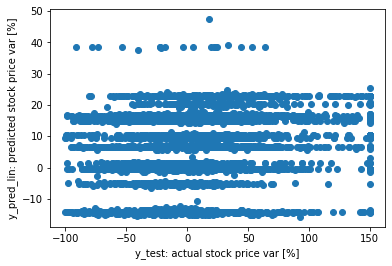

In [104]:
## Multiple Linear Model
## relationship between actual price var [%]  and the predicted stock price var [%]
plt.plot(y_test, y_pred_lin, 'o')
plt.xlabel('y_test: actual stock price var [%]')
plt.ylabel('y_pred_lin: predicted stock price var [%]')

In [105]:
# Multiple Linear Model
## Model Evaluation

## returning the R_Squared: coefficient of determination of the prediction.
RSQ_lin_reg = pd.DataFrame(np.round(lin_reg_model.score(X_test_robust, y_test), 3), ['R_SQUARE'], columns =['LinRegRsq'])
RSQ_lin_reg

,LinRegRsq
R_SQUARE,0.074


In [106]:
## Multiple Linear Regression Model
### error analysis
from sklearn import metrics

# MAE (Mean Absolute Error)
MAE_lin = np.round(metrics.mean_absolute_error(y_test, y_pred_lin), 3)

# MSE (Mean Squared Error)
MSE_lin = np.round(metrics.mean_squared_error(y_test, y_pred_lin), 3)

# RMSE (Root Mean Squared Error)
RMSE_lin = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)), 3)

error_columns = ["MAE", "MSE", "RMSE"]
error_lin_reg = pd.DataFrame([MAE_lin, MSE_lin, RMSE_lin], error_columns, columns=['LinRegError'])
error_lin_reg

,LinRegError
MAE,29.771
MSE,1726.927
RMSE,41.556


### **Ridge Regression**
The Ridge Regression addresses some of the problems of Ordinary Least Squares (Linear Regression) by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares: The **complexity parameter (alpha)** controls the amount of shrinkage: the larger the value of **alpha** , the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

#### class sklearn.linear_model.
     Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated',
    copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

#### random_state
Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. 

In [107]:
## Using Ridge Regression Model
### fitting training data
rg_reg = Ridge(alpha=1.0, fit_intercept = False, random_state=42)
rg_reg.fit(X_train_robust, y_train)
coeff_rg_reg = pd.DataFrame(np.round(rg_reg.coef_, 3), df_X_train_robust.columns, columns=['RidgeCoefficient'])


In [108]:
## Ridge Regression Model
## top 5 coefficients in descending order
coeff_rg_5 = coeff_rg_reg.sort_values('RidgeCoefficient', ascending=False, key=abs).head()
coeff_rg_5

,RidgeCoefficient
x1_Consumer Cyclical,22.846
x1_Energy,20.237
x1_Industrials,16.376
x1_Communication Services,14.987
x1_Financial Services,-14.316


In [109]:
## Ridge Regression Model
### predicting using test data
y_pred_rg = rg_reg.predict(X_test_robust)

In [110]:
# Ridge Regression Model
## Model Evaluation

## returning the R_Squared: coefficient of determination of the prediction.
RSQ_rg = pd.DataFrame(np.round(rg_reg.score(X_test_robust, y_test), 3), ['R_SQUARE'], columns =['RidgeRsq'])
RSQ_rg

,RidgeRsq
R_SQUARE,0.074


In [111]:
## Ridge Regression Model
### error analysis

# MAE (Mean Absolute Error)
MAE_rg = np.round(metrics.mean_absolute_error(y_test, y_pred_rg), 3)

# MSE (Mean Squared Error)
MSE_rg = np.round(metrics.mean_squared_error(y_test, y_pred_rg), 3)

# RMSE (Root Mean Squared Error)
RMSE_rg = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rg)), 3)

error_columns = ["MAE", "MSE", "RMSE"]
error_rg = pd.DataFrame([MAE_rg, MSE_rg, RMSE_rg], error_columns, columns=['RidgeError'])
error_rg

,RidgeError
MAE,29.770
MSE,1726.921
RMSE,41.556


### **Lasso**
The Lasso is a linear model that **estimates sparse coefficients**. It is **useful in contexts due to its tendency to prefer solutions with fewer non-zero coefficients,** effectively reducing the number of features upon which the given solution is dependent. For this reason, Lasso and its variants are f**undamental to the field of compressed sensing**. Under certain conditions, it **can recover the exact set of non-zero coefficients.** The lasso estimate thus **solves the minimization of the least-squares penalty with added term (sum of absolute value of weights)**

In [112]:
## Using Lasso Regression Model
### fitting training data
ls_reg = Lasso(alpha=1, fit_intercept=False, random_state= 42)
ls_reg.fit(X_train_robust, y_train)
coeff_ls_reg = pd.DataFrame(np.round(ls_reg.coef_, 3), df_X_train_robust.columns, columns=['LassoCoefficient'])


In [113]:
## Lasso Regression Model
## top 5 coefficients in descending order
coeff_ls_5 = coeff_ls_reg.sort_values('LassoCoefficient', ascending=False, key=abs).head()
coeff_ls_5

,LassoCoefficient
x1_Consumer Cyclical,13.796
x1_Financial Services,-7.710
x1_Industrials,7.345
x0_2014,-7.162
x1_Energy,0.709


In [114]:
## Lasso Regression Model
### predicting using test data
y_pred_ls = ls_reg.predict(X_test_robust)

In [115]:
# Lasso Regression Model
## Model Evaluation

## returning the R_Squared: coefficient of determination of the prediction.
RSQ_ls = pd.DataFrame(np.round(ls_reg.score(X_test_robust, y_test), 3), ['R_SQUARE'], columns =['LassoRsq'])
RSQ_ls

,LassoRsq
R_SQUARE,0.038


In [116]:
## Lasso Regression Model
### error analysis

# MAE (Mean Absolute Error)
MAE_ls = np.round(metrics.mean_absolute_error(y_test, y_pred_ls), 3)

# MSE (Mean Squared Error)
MSE_ls = np.round(metrics.mean_squared_error(y_test, y_pred_ls), 3)

# RMSE (Root Mean Squared Error)
RMSE_ls = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls)), 3)

error_columns = ["MAE", "MSE", "RMSE"]
error_ls = pd.DataFrame([MAE_ls, MSE_ls, RMSE_ls], error_columns, columns=['LassoError'])
error_ls

,LassoError
MAE,30.308
MSE,1794.723
RMSE,42.364


### **Polynomial Features**

> where the relationship between the feature(s) and the target variable can’t be best described with a straight line.


> linear regression is just a first-degree polynomial. Polynomial regression uses higher-degree polynomials. Both of them are linear models, but the first results in a straight line, the latter gives you a curved line.

PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

degree default=2

interaction_only, default=False If True, only interaction features are produced: features that are products of at most degree distinct input features, i.e. terms with power of 2 or higher of the same input feature are excluded:

included: x[0], x[1], x[0] * x[1], etc.

excluded: x[0] ** 2, x[0] ** 2 * x[1], etc.

include_bias, default=True If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).


In [117]:
## Using Polynomial Regression
# transforming data into polynomial features
# splitting into training and testing data
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(X_data_final)
X_Ptrain, X_Ptest, y_Ptrain, y_Ptest = train_test_split(poly_features, y_data, test_size=0.3, random_state=42)

In [118]:
#### Data Preprocessing
## standardizing the training data for Polynomial Regression
## using RobustScaler
### fitting training data
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler(quantile_range=(25.0, 75.0)).fit(X_Ptrain)

In [119]:
X_Ptrain_robust = np.round(transformer.transform(X_Ptrain), 3)
df_X_Ptrain_robust = pd.DataFrame(X_Ptrain_robust).rename(columns={i: v 
                                                for i, v in enumerate(X_data_final.columns)})

In [120]:
# transforming testing data for polynomial regression
# using RobustScaler
X_Ptest_robust = np.round(transformer.transform(X_Ptest), 3)
df_X_Ptest_robust = pd.DataFrame(X_Ptest_robust).rename(columns={i: v 
                                                for i, v in enumerate(X_data_final.columns)})

In [121]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_Ptrain_robust, y_Ptrain)

LinearRegression()

In [122]:
## Poly Regression Model
## top 5 coefficients in descending order
coeff_poly_reg = pd.DataFrame(np.round(poly_reg_model.coef_, 3), df_X_Ptrain_robust.columns, columns=['PolyCoefficient'])
coeff_poly_5 = coeff_poly_reg.sort_values('PolyCoefficient', ascending=False, key=abs).head()
coeff_poly_5

,PolyCoefficient
3Y Dividend per Share Growth (per Share),19514.927
32,-16514.534
33,-16509.015
138,-9346.351
119,-3838.237


In [123]:
#  Poly Regression Model
## Model Evaluation

## returning the R_Squared: coefficient of determination of the prediction (accuracy)
RSQ_poly = pd.DataFrame(np.round(poly_reg_model.score(X_Ptest_robust, y_Ptest), 3), ['R_SQUARE'], columns =['PolyRsq'])
RSQ_poly

,PolyRsq
R_SQUARE,-1.435


In [124]:
poly_reg_y_predicted = poly_reg_model.predict(X_Ptest_robust)


In [125]:
## Poly Regression Model
### error analysis

# MAE (Mean Absolute Error)
MAE_poly = np.round(metrics.mean_absolute_error(y_Ptest, poly_reg_y_predicted), 3)

# MSE (Mean Squared Error)
MSE_poly = np.round(metrics.mean_squared_error(y_Ptest, poly_reg_y_predicted), 3)

# RMSE (Root Mean Squared Error)
RMSE_poly = np.round(np.sqrt(metrics.mean_squared_error(y_Ptest, poly_reg_y_predicted)), 3)

error_columns = ["MAE", "MSE", "RMSE"]
error_poly = pd.DataFrame([MAE_ls, MSE_ls, RMSE_ls], error_columns, columns=['PolyError'])
error_poly

,PolyError
MAE,30.308
MSE,1794.723
RMSE,42.364


## **Observation/Conclusion for This Task**

In [126]:
## Observation/Conclusion for This Task
### Model wise top coefficient features 
pd.concat([coeff_lin_5, coeff_rg_5, coeff_ls_5, coeff_poly_5], axis=1)

,LinRegCoefficient,RidgeCoefficient,LassoCoefficient,PolyCoefficient
x1_Consumer Cyclical,22.860,22.846,13.796,NaN
x1_Energy,20.263,20.237,0.709,NaN
x1_Industrials,16.386,16.376,7.345,NaN
x1_Communication Services,15.041,14.987,NaN,NaN
x1_Financial Services,-14.322,-14.316,-7.710,NaN
x0_2014,NaN,NaN,-7.162,NaN
3Y Dividend per Share Growth (per Share),NaN,NaN,NaN,19514.927
32,NaN,NaN,NaN,-16514.534
33,NaN,NaN,NaN,-16509.015
138,NaN,NaN,NaN,-9346.351



#### **Interpret the model performance top coefficient features for each class:** 
##### **Multiple Linear Regression**: top coefficients features
Assuming that all the other features remain constant (conditional dependence), 
1. for any year financial indicators, on average stock price for Consumer Cyclical sector company is expected to go up by 22.86 % next year.
2. for any year financial indicators, on average stock price for Energy sector company is expected to go up by 
20.26 % next year.
3. for any year financial indicators, on average stock price for industrial sector company is expected to go up by 16.39 % next year.
4. for any year financial indicators, on average stock price for communication services  sector company is expected to go up by 15.04 % next year.
5. for any year financial indicators, on average stock price for financial services sector company is expected to fall by 14.32 % next year.


> **Linear regression is the most basic form of medel, where the model is not penalized for its choice of weights, at all. That means, during the training stage, if the model feels like one particular feature is particularly important, the model may place a large weight (i.e. large feature coefficient) to the feature. This sometimes leads to overfitting in small datasets. Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.**



##### **Ridge Regression**: top coefficients features
Almost same trend (with minor variation in %) is expected with ridge regression modeling



> **Ridge takes a step further and penalizes the model for the sum of squared value of the weights. Thus, the weights not only tend to have smaller absolute values, but also really tend to penalize the extremes of the weights, resulting in a group of weights (i.e feature coefficients) that are more evenly distributed. Ridge tends to give small but well distributed weights, because the l2: ridge regularization cares more about driving big weight to small weights, instead of driving small weights to zeros. If we only have a few predictors or features, and we are confident that all of them should be really relevant for predictions, try Ridge Regression Model as a good regularized linear regression method. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.  Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.**


##### **Lasso Linear**: top coefficients features
Assuming that all the other features remain constant (conditional dependence),
1. for any year financial indicators, on average stock price for Consumer Cyclical sector company is expected to go up by 13.8 % next year.
2. for any year financial indicators, on average stock price for Energy sector company is expected to go up by 0.71 % next year.
3. for any year financial indicators, on average stock price for industrial sector company is expected to go up by 7.35 % next year.


> **Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights. Thus, in general, the absolute values of weight will be reduced, and many will tend to be zeros. Lasso introduced a new parameter, alpha, the coefficient to penalize weights. Lasso tends to give sparse weights (most zeros), because the l1: lasso regularization cares equally about driving down big weights to small weights, or driving small weights to zeros. If we have a lot of predictors (features), and we suspect that not all of them are that important, Lasso Regression Model may be really good idea to begin with. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. Lasso sometimes struggles with some types of data. If the number of features is greater than the number of observations(n), Lasso will pick at most n features as non-zero, even if all predictors are relevant. If there are two or more highly collinear variables then LASSO regression select one of them randomly which is not good for the interpretation of data.** 



### **Show Examples Where the Model Fails**

### Examples Where the Model Fails:

*   **Nonconstant variance and weighted least squares:** For example, if the residual variance increases with the fitted values, then prediction intervals will tend to be wider than they should be at low fitted values and narrower than they should be at high fitted values.
*   **Autocorrelation and time series methods:** when the sample data have been collected over time and the regression model fails to effectively capture any time trends. In such a circumstance, the random errors in the model are often positively correlated over time, so that each random error is more likely to be similar to the previous random error that it would be if the random errors were independent of one another. This phenomenon is known as autocorrelation.
*   **Multicollinearity**, which exists when two or more of the predictors in a regression model are moderately or highly correlated with one another.
*   **Overfitting**
*   **Excluding important predictor variables**
*   **Extrapolation**
*   **Missing data**
*   **Power and sample size**

### **Error Analysis**

In [127]:
## Observation/Conclusion for This Task
### Error Analysis
pd.concat([error_lin_reg, error_rg, error_ls, error_poly], axis = 1)


,LinRegError,RidgeError,LassoError,PolyError
MAE,29.771,29.770,30.308,30.308
MSE,1726.927,1726.921,1794.723,1794.723
RMSE,41.556,41.556,42.364,42.364


In [128]:
### R_Square Analysis
pd.concat([RSQ_lin_reg, RSQ_rg, RSQ_ls, RSQ_poly], axis=1)

,LinRegRsq,RidgeRsq,LassoRsq,PolyRsq
R_SQUARE,0.074,0.074,0.038,-1.435


### **Error Analysis**
#### explain where do you think the errors come from and why? Do you have any possible solution to improve the model performance?

There are following primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared 

*   Mean absolute error (MAE), 
*   Mean squared error (MSE)
*   Root mean squared error (RMSE)
*   R-squared

> MAE: The easiest to understand. Represents average error

> MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.

> RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model. 

**An error term (RMSE)  is a residual variable that accounts for a lack of perfect goodness of fit.**

> R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values. **R-squared is the percentage of the dependent variable variation that a linear model explains.**

 R^2 = {Variance explained by the model}/{Total variance}
**From above analysis, about stock price prediction linear model, we may see the model explains only 7.4 %, 7.4 % and 4 % of the stock price variation with linear regression, Ridge Regression and Lasso Regression model techniques respectively.**

Once we have error metrics, we may come to know **which X’s have minimal impacts on y. Such input variables do not explain much in variation in target variable, they just create noise / bais and error in target variable. Removing some of these input features may result in an increased accuracy of the model.**

So, We **begin a process of trial and error**, where the process is started over again, until a satisfactory model is produced. There are many other ways to improve Accuracy reduce Errors like :
1. Check wether the **regression dataset Columns/Features as are Linear or Non-Linear** as RMSE would be pretty high for Non-Linear data.

2. **Removing or Imputing outliers** with mean or median might help reduce errors . Box-plots for each column might help find outliers.

3. **Coefficients must be scaled to the same unit of measure to retrieve feature importance.** Scaling them with the standard-deviation of the feature is a useful proxy.

4. Coefficients in multivariate linear models represent the dependency between a given feature and the target, conditional on the other features. Correlated features induce instabilities in the coefficients of linear models and their effects cannot be well teased apart. Different linear models respond differently to feature correlation and coefficients could significantly vary from one another. **Inspecting coefficients across the folds of a cross-validation loop gives an idea of their stability**
